# SIC for FNGS Pipeline

Like the **ndmg** diffusion MRI pipeline, the FNGS pipeline operates in two steps: connectome estimation, and statistical analysis. 

## Connectome Estimation

The FNGS pipeline must first translate our raw functional MRI images into connectomes. Pessing "run" on the cell below will call the ndmg functional demo script.

![fngs pipeline](https://raw.githubusercontent.com/NeuroDataDesign/fngs/master/docs/ebridge2/brainx2_pres/img/fngs_workflow.png)
**Figure 1**: The workflow for the FNGS Pipeline. 

To estimate our functional connectomes, we leverage many tools along the way, notably:


 Step            |  Tool(s) leveraged  
-----------------|-------------------------
   Preprocessing |  mcflirt (FSL), slicetimer (FSL)
   Registration  |  FLIRT (FSL), FLIRT-bbr (FSL), FNIRT (FSL), MNI 152 Template (MNI)
   Nuisance      |  Neurodata Code (Neurodata)
   Timeseries Extraction/Connectome Estimation | Parcellation Atlases
   
**Figure 2**: The tools leveraged by the FNGS Pipeline.

If you get "`process interrupted`" as an output for any step of this notebook refresh the page and start again from the top; this is due to the server rebooting which it is scheduled to do every few hours.

Now that we are acquainted with the basics of the pipeline, feel free to click the cell below, and click the "play" button in the bar at the top:

In [1]:
%%bash

ndmg_demo_func

Getting test data...
Archive:  /tmp/ndmg_demo_func.zip
  inflating: ndmg_demo_func/sub-0025864_session-1_bold_small.nii.gz  
  inflating: ndmg_demo_func/sub-0025864_session-1_T1w_small.nii.gz  
  inflating: ndmg_demo_func/MNI152_T1-4mm_brain.nii.gz  
  inflating: ndmg_demo_func/MNI152_T1-4mm.nii.gz  
  inflating: ndmg_demo_func/desikan-4mm.nii.gz  
  inflating: ndmg_demo_func/HarvOx_lv_thr25-4mm.nii.gz  
  inflating: ndmg_demo_func/MNI152_T1-4mm_brain_mask.nii.gz  
Creating output directory: /tmp/ndmg_demo_func/outputs
Creating output temp directory: /tmp/ndmg_demo_func/outputs/tmp
This pipeline will produce the following derivatives...
fMRI volumes preprocessed: /tmp/ndmg_demo_func/outputs/tmp/sub-0025864_session-1_bold_small_preproc.nii.gz
fMRI volumes motion corrected: /tmp/ndmg_demo_func/outputs/tmp/sub-0025864_session-1_bold_small_mc.nii.gz
fMRI volume registered to atlas: /tmp/ndmg_demo_func/outputs/reg/func/align/sub-0025864_session-1_bold_small_aligned.nii.gz
Voxel timecourse i

Error 134: Image Exception : #22 :: ERROR: Could not open image /tmp/ndmg_demo_func/outputs/tmp/sub-0025864_session-1_T1w_small_brain
terminate called after throwing an instance of 'RBD_COMMON::BaseException'
Aborted (core dumped)



### View Timeseries Estimation Results

Your fMRI timeseries can be viewed with the following code. Click in the block, and press the "play" button at the top to execute it. 

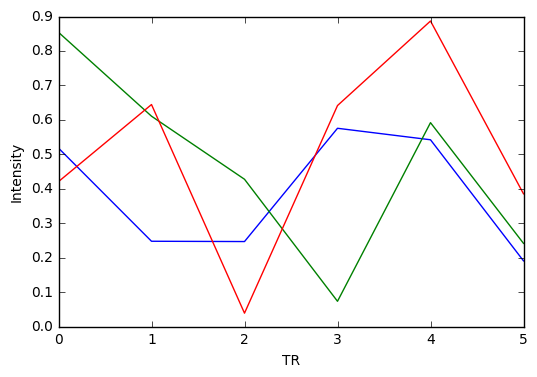

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

ts = np.load('/tmp/ndmg_demo_func/outputs/ts_roi/desikan-4mm/sub-0025864_session-1_bold_small_desikan-4mm.npy')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ts)
ax.set_xlabel('TR')
ax.set_ylabel('Intensity')
ax.set_title('Subject 0025864 session 1 ROI timeseries')

### View Connectome Estimation Results

You can view your functional connectome with the following code. Again, click anywhere in the block and press the "play" button to execute it.

In [ ]:
import networkx as nx

g = nx.read_gpickle('/tmp/ndmg_demo_func/outputs/connectomes/desikan-4mm/sub-0025864_session-1_bold_small_desikan-4mm.gpickle')
mtx = nx.to_numpy_matrix(g)
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
cax = ax.imshow(mtx, interpolation='None')
ax.set_xlabel('ROI')
ax.set_ylabel('ROI')
ax.set_title('Subject 0025864 session 1 Functional Connectome')
fig.colorbar(cax)
fig.show()

### View Statistical Reports and Quality Assurances

The FNGS pipeline produces numerous statistical reports and quality assurance summaries, both qualitative and quantitative, at both the subject-specific and group level. The subject-level qa will be alongside your local outputs in the qa folder. To generate the group-level qa, we can use the following command:

In [ ]:
%%bash

ndmg_bids /tmp/ndmg_demo_func/outputs /tmp/ndmg_demo_func/outputs/qa/group group func \

cp /tmp/ndmg_demo_func/outputs/qa/group/connectomes/desikan-4mm/desikan-4mm_plot.html /home/sic-user/qc_desikan_plot.html
cp /tmp/ndmg_demo_func/outputs/qa/group/reg/registration_qa.html /home/sic-user/reg_plot.html

### View Summary Statistics

Like the diffusion pipeline, the FNGS pipeline produces a plot which tells you about your functional connectomes.

Click [this link](./qc_desikan_plot.html) to view the result!

Also, we generate group-level quality assurances for individual steps of the pipeline. At the dataset level, these group quality assurance plots make the identification of subjects to hold out relatively simple. A registration failure, for instance, might not be readily apparent from the connectome itself, but evaluation of the overlap between the brain region with that of the template may give further insight:

Click [this link](./qc_reg.html) to check out the registration metrics. 

We also provide metrics for evaluating preprocessing, and are working on producing quantitative metrics for nuisance correction.

# Webservice Tutorial

At [this link](http://cortex.jhu.edu:8061/submit/demo/), we provide the FNGS web service. The FNGS web service leverages AWS Batch, and we heavily automate the batch deployment service other than a few account setup requirements. 

![fngs deployment](https://raw.githubusercontent.com/NeuroDataDesign/fngs/master/docs/ebridge2/brainx2_pres/img/deployment.png)
**Figure 2** the FNGS webservice deployment schematic. Users provide a directory according to the BIDs spec to the FNGS cloud controller locally via the docker container at (1). The data is uploaded directly to AWS S3 cloud drives. The controller then initiates the Batch deployment procedure at (2.a), which interfaces between S3 and EC2 cloud computers to provide the MRI scans to EC2 instances pre-loaded with the FNGS pipeline for analysis. After the scans are finished being analyzed on the EC2 instances at (2.b), the results are then re-uploaded back to the S3 cloud drive at (2.c). The user can then navigate to the S3 cloud drive for downstream analyses.

Tutorials for the downsampled website demo can be found [batch deployment demo](https://github.com/NeuroDataDesign/fngs/blob/master/website_demo_walkthrough.md), and tutorials for the full-service submission are [submission tutorial](https://github.com/NeuroDataDesign/fngs/blob/master/website_cloud.md).

# Local Tutorial

For local deployment of the FNGS pipeline, feel free to follow our [local pipeline tutorial](https://github.com/NeuroDataDesign/fngs/blob/master/local_bids.md) where we provide an example of the BIDs format and an entrypoint to run the FNGS pipeline locally on a BIDs-spec'd input. 